In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_mall = pd.read_csv('D:\Intership Data\iNeubytes\Mall_Customers.csv')
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df_mall.shape

(200, 5)

In [4]:
df_mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df_mall.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df_mall.duplicated().sum()

0

In [10]:
df_mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


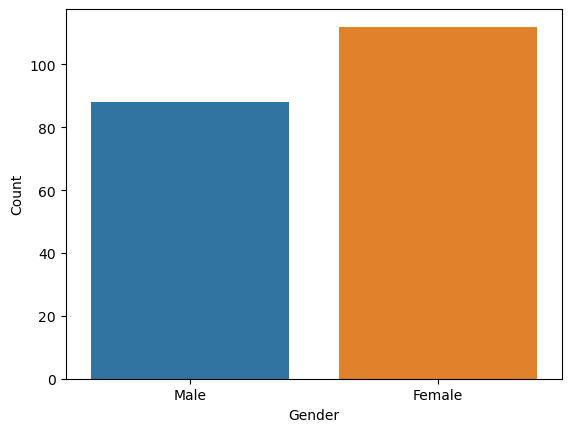

In [74]:
#EDA
sns.countplot(data=df_mall,x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\91749\AppData\Local\Temp\ipykernel_10208\1652168286.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mall['Age'])


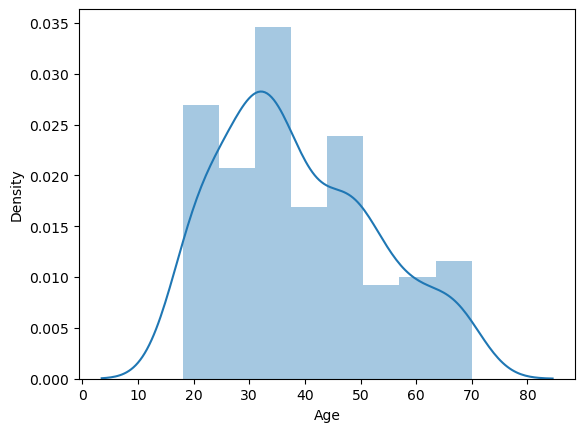

In [15]:
sns.distplot(df_mall['Age'])
plt.show()

C:\Users\91749\AppData\Local\Temp\ipykernel_10208\4131423582.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mall['Annual Income (k$)'])


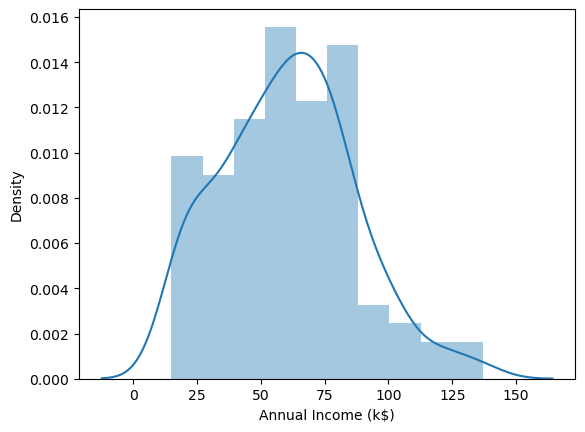

In [16]:
sns.distplot(df_mall['Annual Income (k$)'])
plt.show()

C:\Users\91749\AppData\Local\Temp\ipykernel_10208\471140092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mall['Spending Score (1-100)'])


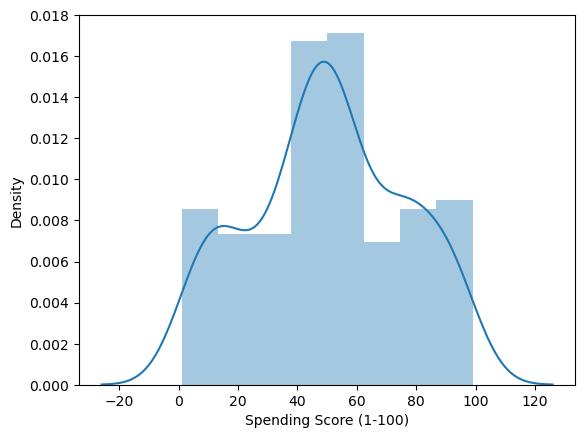

In [17]:
sns.distplot(df_mall['Spending Score (1-100)'])
plt.show()

In [18]:
corr=df_mall.corr()

C:\Users\91749\AppData\Local\Temp\ipykernel_10208\1065223693.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_mall.corr()


<Axes: >

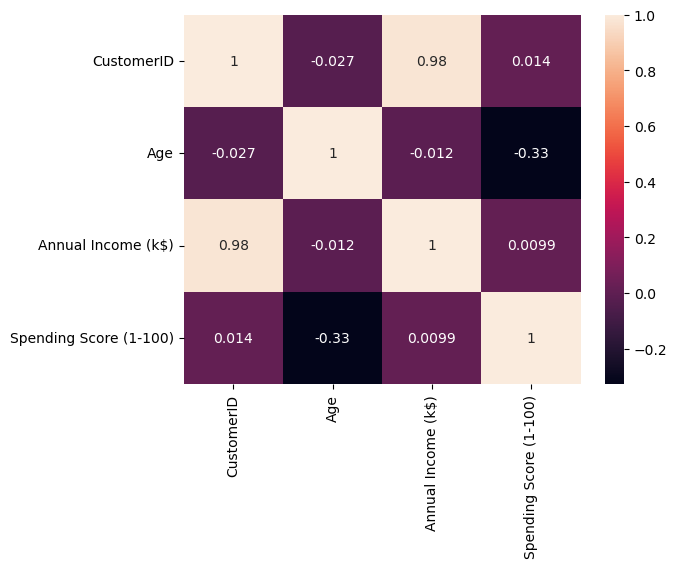

In [19]:
sns.heatmap(corr,annot=True,)

In [22]:
df1=df_mall[['Annual Income (k$)','Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


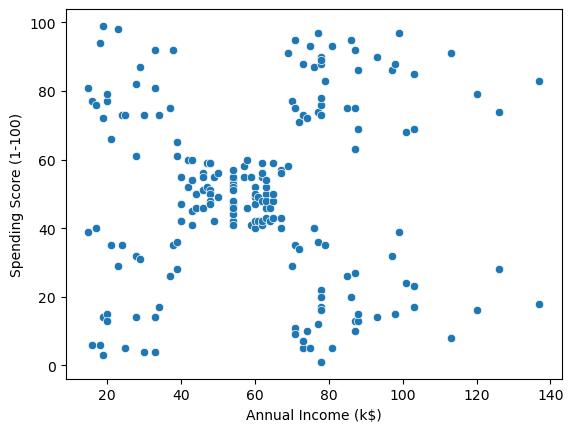

In [27]:
sns.scatterplot(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)')
plt.show()

In [36]:
from sklearn.cluster import KMeans
errors=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

f:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
f:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
f:\a

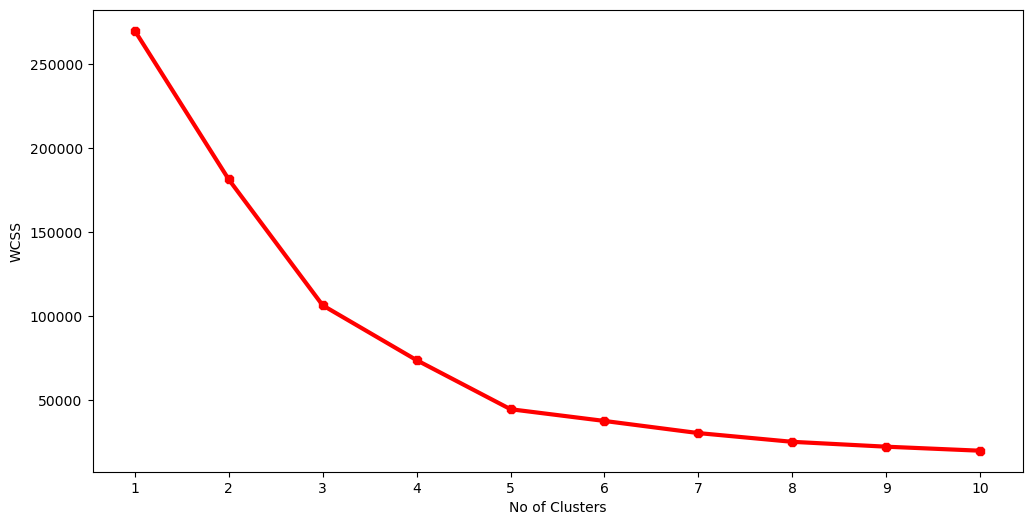

In [37]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth=3,color='red',marker='8')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [41]:
km = KMeans(n_clusters=5)
km.fit(df1)
y=km.predict(df1)
df1['Label']=y
df1.head()

f:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91749\AppData\Local\Temp\ipykernel_10208\1391240281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Label']=y


,Annual Income (k$),Spending Score (1-100),Label
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

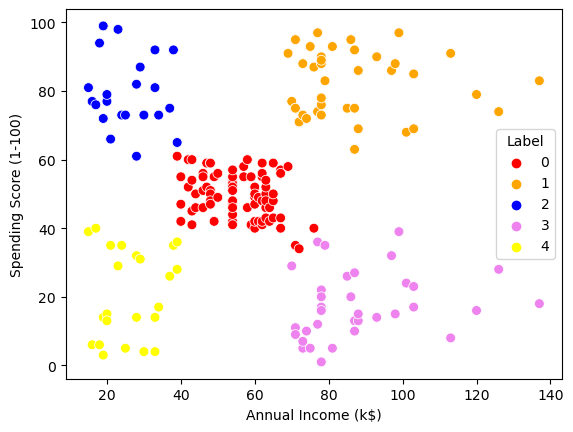

In [43]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1, hue='Label',s=50,palette=['red','orange','blue','violet','yellow'])

In [56]:
df2=df_mall[['Age','Annual Income (k$)','Spending Score (1-100)']]
df2.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [57]:
from sklearn.cluster import KMeans
errors=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

f:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
f:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
f:\a

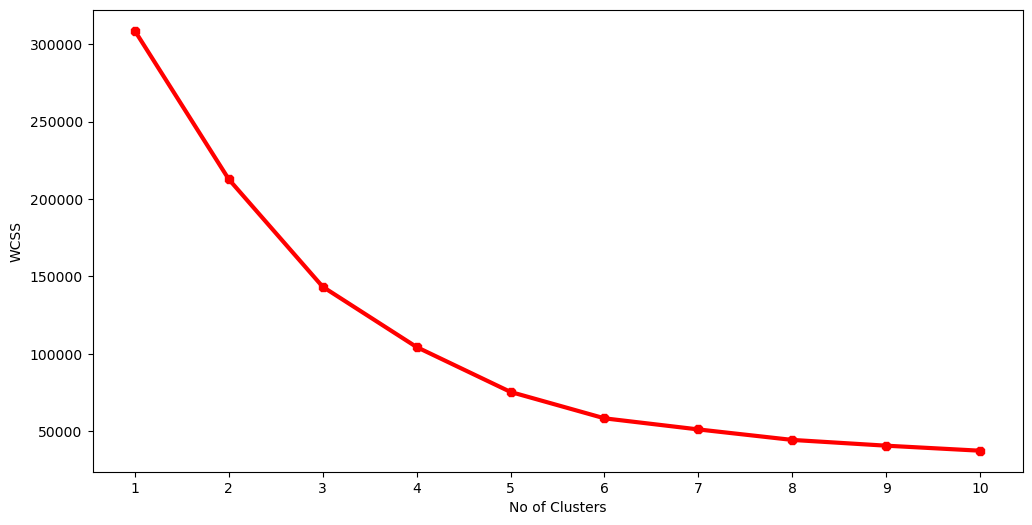

In [58]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth=3,color='red',marker='8')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [66]:
km = KMeans(n_clusters=5)
km.fit(df2)
y=km.predict(df2)
df2['Label']=y
df2.head()

f:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91749\AppData\Local\Temp\ipykernel_10208\1870125555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Label']=y


,Age,Annual Income (k$),Spending Score (1-100),Label
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4


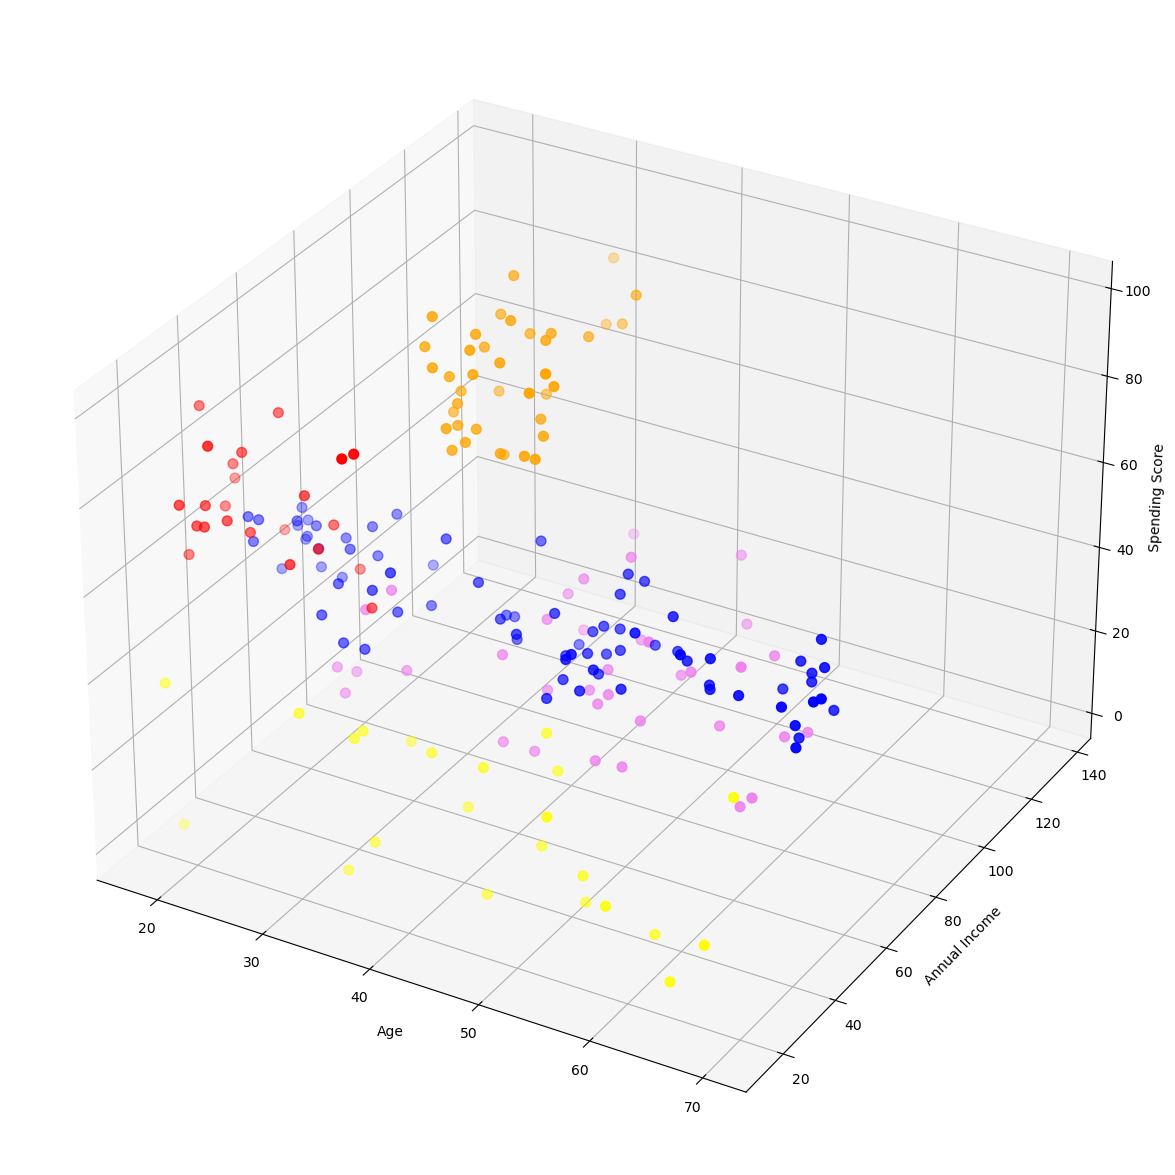

In [73]:
fig=plt.figure(figsize=(26,15))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df2['Age'][df2['Label']==0],df2['Annual Income (k$)'][df2['Label']==0],df2['Spending Score (1-100)'][df2['Label']==0],c='red',s=50)
ax.scatter(df2['Age'][df2['Label']==1],df2['Annual Income (k$)'][df2['Label']==1],df2['Spending Score (1-100)'][df2['Label']==1],c='orange',s=50)
ax.scatter(df2['Age'][df2['Label']==2],df2['Annual Income (k$)'][df2['Label']==2],df2['Spending Score (1-100)'][df2['Label']==2],c='blue',s=50)
ax.scatter(df2['Age'][df2['Label']==3],df2['Annual Income (k$)'][df2['Label']==3],df2['Spending Score (1-100)'][df2['Label']==3],c='violet',s=50)
ax.scatter(df2['Age'][df2['Label']==4],df2['Annual Income (k$)'][df2['Label']==4],df2['Spending Score (1-100)'][df2['Label']==4],c='yellow',s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()